In [81]:
import sys
import numpy as np
import pandas as pd
import pickle
import json
import seaborn as sns
import matplotlib.pyplot as plt


In [82]:
from sklearn.model_selection import train_test_split

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sktime.classification.dictionary_based import IndividualBOSS, ContractableBOSS, BOSSEnsemble
from sktime.classification.hybrid import HIVECOTEV1
from sktime.classification.kernel_based import ROCKETClassifier
from sktime.classification.shapelet_based import ShapeletTransformClassifier
from sktime.contrib.vector_classifiers._rotation_forest import RotationForest
from sktime.classification.interval_based import RandomIntervalSpectralForest, TimeSeriesForestClassifier
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

In [84]:
json_data = []
SERIES_LEN =300
TRAIN_TEST_RATIO=0.7
with open(f'{SERIES_LEN}_data.json') as f:
    data = json.load(f)

In [85]:
from copy import deepcopy

In [86]:
data.keys()

dict_keys(['MW', 'Oil Heater', 'HD', 'WM', 'IR', 'FR', 'MG', 'EK', 'GY', 'AP', 'ND'])

In [87]:
X=[]
y=[]
for curr_key,curr_val in data.items():
    print(curr_key)
    for curr_arr in curr_val:
        y.append(curr_key)
        X.append(deepcopy(curr_arr))

MW
Oil Heater
HD
WM
IR
FR
MG
EK
GY
AP
ND


In [88]:
len(X)

3060

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True,random_state=2121219,stratify=y, train_size=TRAIN_TEST_RATIO)

In [90]:
def get_correct_format(arr):
    ret_arr=[]
    for curr_arr in arr:
        ret_arr.append([pd.Series(curr_arr)])
    return pd.DataFrame(ret_arr)

In [91]:
X_train=get_correct_format(X_train)

In [92]:
X_test=get_correct_format(X_test)

In [93]:
len(X_train)

2142

In [94]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [95]:
def get_freq(arr):
    curr_dict={}
    for x in arr:
        try:
            curr_dict[x]+=1
        except:
            curr_dict[x]=1
    return curr_dict

In [96]:
models=[]

# #####################################

In [97]:
models = []
models.append(('Rocket', ROCKETClassifier(num_kernels=1000)))
#models.append(('IndividualBOSS', IndividualBOSS()))
#models.append(('RISE', RandomIntervalSpectralForest(n_estimators=10)))
#models.append(('TSForest', TimeSeriesForestClassifier()))
#models.append(('Shapelet', ShapeletTransformClassifier(estimator=RotationForest(n_estimators=3), n_shapelet_samples=500, max_shapelets=20, batch_size=100)))

In [98]:
# models.append(('ContractableBOSS', ContractableBOSS(n_parameter_samples=25, max_ensemble_size=5)))

In [99]:
# computationally heavy classifiers

#models.append(('BOSSEnsemble', BOSSEnsemble(max_ensemble_size=5)))
#models.append(('KNTs', KNeighborsTimeSeriesClassifier()))

In [100]:
y

['MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',
 'MW',

In [101]:
c_mat={}
use_labels=list(set(y))

In [102]:
scores = []
names = []
models_dict={}
for name, model in models:
    model.fit(X_train, y_train)
    model_score = model.score(X_test, y_test)
    y_pred=model.predict(X_test)
    c_mat[name]=confusion_matrix(y_test, y_pred, labels=use_labels)
    scores.append(model_score)
    names.append(name)
    models_dict[name]=deepcopy(model)
    print("{:s}: {:.3f}".format(name, model_score))

with open(str(SERIES_LEN) +"_"+str(TRAIN_TEST_RATIO)+ "_models.pckl", "wb") as f:
    pickle.dump(models_dict, f)

Rocket: 0.782


In [103]:
!ls

100_data.json	     backup.md		      explore.ipynb
1200_data.json	     classifier.ipynb	      mod_data.json
300_0.7_models.pckl  commands.md	      model_explore.ipynb
300_data.json	     construct_dataset.ipynb  pickle_files
600_0.9_models.pckl  data.json		      predict_lib.py
600_data.json	     data_old.json	      rocket_tut.ipynb
analyze.ipynb	     dtw_try.ipynb	      test.py


In [104]:
c_mat

{'Rocket': array([[ 60,   0,   0,   2,   0,   0,   0,   5,   0,   3,   2],
        [  0,  42,   5,   0,   0,   0,   0,   1,   0,   0,   0],
        [  0,   0, 170,   0,   1,   0,   0,   1,   8,   0,   0],
        [  0,   0,   0,  12,   0,   0,   0,   0,  18,   0,   0],
        [  0,   0,   5,   1,   8,   0,   0,   6,  20,  20,   6],
        [ 14,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4],
        [  1,   5,   3,   1,   1,   0,  25,   1,   1,   4,   0],
        [  2,   0,   4,   0,   0,   0,   0, 152,   0,   2,   2],
        [  0,   0,   0,   0,   0,   0,   0,   0,  66,   0,   0],
        [  1,   1,   0,   0,   0,   0,   0,   1,   0, 123,  12],
        [  5,   0,   0,   3,   0,   0,   0,   0,   0,  28,  60]])}

In [114]:
labels_dict={"MW":"Microwave","WM":"Washing Machine","HD":"Hair dryer","ND":"No device","GY":"Geyser","EK":"Electric Kettle"}

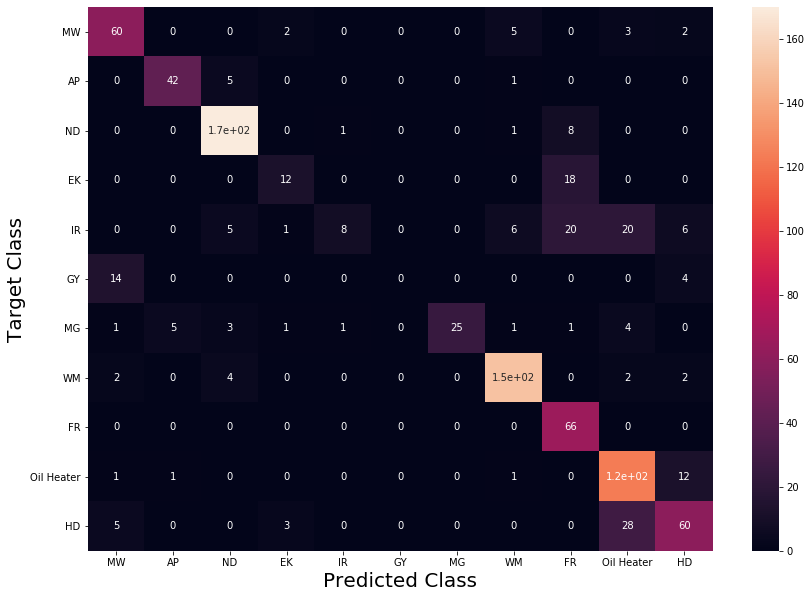

In [115]:
df_cm = pd.DataFrame(c_mat['Rocket'], index = use_labels,
                  columns = use_labels)
plt.figure(figsize = (14,10))
ax=sns.heatmap(df_cm, annot=True)
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Target Class", fontsize=20)

#ax.set(xlabel='Predicted class', ylabel='Actual class')
plt.show(ax)

In [116]:
from collections import Counter

In [117]:
Counter(y)

Counter({'MW': 240,
         'Oil Heater': 460,
         'HD': 320,
         'WM': 540,
         'IR': 220,
         'FR': 220,
         'MG': 140,
         'EK': 100,
         'GY': 60,
         'AP': 160,
         'ND': 600})

In [ ]:
s